In [12]:
import pandas as pd
import re
import nltk
import os
import streamlit as st
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Pastikan stopwords sudah diunduh
nltk.download("stopwords")
nltk.download("punkt")

# Load dataset dengan error handling
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"❌ File tidak ditemukan: {file_path}")

try:
    df = pd.read_csv(
        file_path, 
        encoding="utf-8", 
        on_bad_lines="skip",  # Lewati baris bermasalah
        sep="\t",  # Menggunakan tab sebagai pemisah
        quoting=3  # Mengabaikan kutipan yang tidak beraturan
    )
    print("✅ File CSV berhasil dimuat!")
except Exception as e:
    raise ValueError(f"❌ Gagal membaca file CSV: {e}")

# Pastikan kolom tweet ada
tweet_column = "tweet"
if tweet_column not in df.columns:
    raise ValueError("❌ Kolom 'tweet' tidak ditemukan dalam dataset!")

# Fungsi membersihkan teks
def clean_tweet(text):
    if not isinstance(text, str):
        return ""  # Jika bukan string, kembalikan string kosong
    
    text = text.lower()  # Konversi ke huruf kecil
    text = re.sub(r"http\S+", "", text)  # Hapus URL
    text = re.sub(r"@\w+", "", text)  # Hapus mention
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)  # Hapus hashtag
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)  # Hapus karakter khusus
    text = re.sub(r"\s+", " ", text).strip()  # Hapus spasi berlebih

    words = word_tokenize(text)  # Tokenisasi
    stop_words = set(stopwords.words("indonesian"))  # Stopwords bahasa Indonesia
    filtered_words = [word for word in words if word not in stop_words]  # Hapus stopwords
    
    return " ".join(filtered_words)

# Bersihkan teks
df["clean_tweet"] = df[tweet_column].astype(str).apply(clean_tweet)

# Hapus duplikasi
df = df.drop_duplicates(subset=["clean_tweet"])

# Simpan hasil ke file baru
output_file = "clean_twitter_data.csv"
df.to_csv(output_file, index=False, encoding="utf-8")

print(f"🎉 Pembersihan selesai! Data disimpan dalam '{output_file}'")

[nltk_data] Downloading package stopwords to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\3184709513.py:20: DtypeWarning: Columns (0,1,2,3,4,7,8,9,10,11,12,13,14,18,19,20,21,22,24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


✅ File CSV berhasil dimuat!
🎉 Pembersihan selesai! Data disimpan dalam 'clean_twitter_data.csv'


In [14]:
# 📌 Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📌 Lokasi Dataset
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\clean_twitter_data.csv"

# 📌 Cek apakah file ada
if not os.path.exists(file_path):
    print(f"❌ Error: File tidak ditemukan di lokasi {file_path}")
else:
    # ✅ Baca Dataset
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil dimuat!")
    
    # ✅ Cek Nama Kolom
    print("🔹 Kolom yang tersedia:", df.columns)

    # ✅ Pastikan Tidak Ada NaN di Kolom Tweet
    df = df.dropna(subset=["tweet"]) 

    # 📌 1️⃣ Summary Statistics
    print("\n📊 Summary Statistics:")
    print(df.describe())

    # 📌 2️⃣ Konversi Kolom Timestamp (Cek Nama Kolom yang Sesuai)
    timestamp_col = None
    for col in ["timestamp", "created_at", "date", "datetime"]:
        if col in df.columns:
            timestamp_col = col
            break

    if timestamp_col:
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])
        df["date"] = df[timestamp_col].dt.date
        print(f"✅ Menggunakan kolom waktu: {timestamp_col}")
    else:
        print("⚠️ Tidak ada kolom waktu yang valid ditemukan!")

    # 📌 3️⃣ Visualisasi Volume Tweet Seiring Waktu
    if timestamp_col:
        tweet_counts = df.groupby("date").size()

        plt.figure(figsize=(12, 5))
        sns.lineplot(x=tweet_counts.index, y=tweet_counts.values, marker="o", color="blue")
        plt.title("📈 Volume Tweet Seiring Waktu")
        plt.xlabel("Tanggal")
        plt.ylabel("Jumlah Tweet")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
    else:
        print("⚠️ Tidak bisa menampilkan volume tweet karena kolom waktu tidak ditemukan!")

    # 📌 4️⃣ Aktivitas Pengguna Paling Aktif
    user_col = None
    for col in ["user", "username", "author"]:
        if col in df.columns:
            user_col = col
            break

    if user_col:
        top_users = df[user_col].value_counts().nlargest(10)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_users.values, y=top_users.index, palette="coolwarm")
        plt.title("🏆 10 Pengguna Paling Aktif")
        plt.xlabel("Jumlah Tweet")
        plt.ylabel("Username")
        plt.show()
    else:
        print("⚠️ Tidak bisa menampilkan aktivitas pengguna karena kolom 'user' tidak ditemukan!")

    # 📌 5️⃣ Metrik Keterlibatan (Retweet & Like)
    engagement_cols = ["retweets", "likes", "favorites"]
    valid_engagement_cols = [col for col in engagement_cols if col in df.columns]

    if valid_engagement_cols:
        plt.figure(figsize=(12, 6))
        df[valid_engagement_cols].sum().plot(kind="bar", color=["orange", "blue", "green"])
        plt.title("📊 Total Keterlibatan (Retweet & Like)")
        plt.ylabel("Jumlah")


C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\1479848953.py:15: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\1479848953.py:36: FutureWarning: Parsed string "2020-12-19 23:18:03 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df[timestamp_col] = pd.to_datetime(df[timestamp_col])


✅ Dataset berhasil dimuat!
🔹 Kolom yang tersedia: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'clean_tweet'],
      dtype='object')

📊 Summary Statistics:
                 id  conversation_id  timezone       user_id  place  \
count  3.886200e+04     3.886200e+04   38862.0  3.886200e+04    0.0   
mean   1.340024e+18     1.339948e+18     700.0  7.788162e+17    NaN   
std    1.256955e+14     3.024211e+15       0.0  5.528814e+17    NaN   
min    1.339783e+18     9.151941e+17     700.0  1.409958e+07    NaN   
25%    1.339930e+18     1.339913e+18     700.0  2.383775e+09    NaN

C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\1479848953.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\1479848953.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="coolwarm")
C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\1479848953.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


[nltk_data] Downloading package punkt to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package brown to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Fathu
[nltk_data]     Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Fathu Rizka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_e

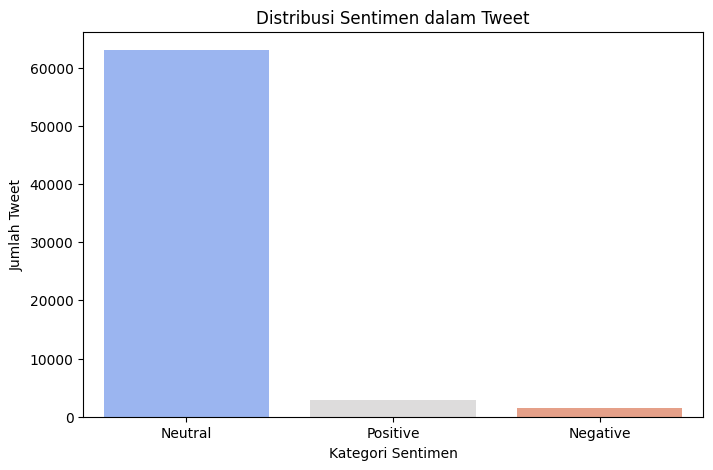

C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_18856\2881825083.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=emotion_counts.index.astype(str), x=emotion_counts.values, palette="viridis")


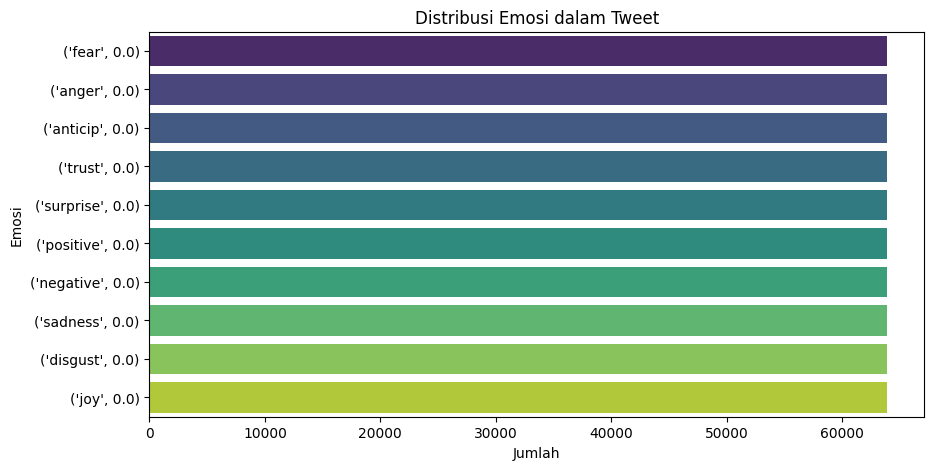

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')  # Jika menggunakan SentimentIntensityAnalyzer dari nltk


from textblob import TextBlob
from textblob.download_corpora import download_all

download_all()
from nltk.sentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex

# 📌 Load Dataset
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\twitter_data_cleaned.csv"
df = pd.read_csv(file_path)

# Pastikan kolom "tweet" ada dalam dataset
if "tweet" not in df.columns:
    raise KeyError("Kolom 'tweet' tidak ditemukan dalam dataset!")

# 📌 Download dan Setup Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# 📌 Analisis Sentimen
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["tweet"].astype(str).apply(get_sentiment)

# 📌 Analisis Emosi dengan NRCLex
def get_emotion(text):
    emotion = NRCLex(text)
    return emotion.top_emotions

df["Emotions"] = df["tweet"].astype(str).apply(get_emotion)

# 📌 Visualisasi Sentimen
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Distribusi Sentimen dalam Tweet")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()

# 📌 Visualisasi Emosi
# Pastikan tidak ada nilai NaN atau kosong sebelum explode()
df["Emotions"] = df["Emotions"].apply(lambda x: x if isinstance(x, list) else [])

# Hitung distribusi emosi
emotion_counts = df["Emotions"].explode().value_counts().head(10)  # Ambil 10 emosi teratas

# Pastikan tidak ada masalah dengan index sebelum plotting
if not emotion_counts.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(y=emotion_counts.index.astype(str), x=emotion_counts.values, palette="viridis")
    plt.title("Distribusi Emosi dalam Tweet")
    plt.xlabel("Jumlah")
    plt.ylabel("Emosi")
    plt.show()
else:
    print("⚠️ Tidak ada data emosi yang tersedia untuk divisualisasikan.")

In [15]:
from transformers import pipeline

# Load model NLP untuk analisis emosi
emotion_pipeline = pipeline("text-classification", model="joeddav/distilbert-base-uncased-go-emotions-student", top_k=1)

# Fungsi untuk mendapatkan label emosi dari model
def get_emotion(text):
    try:
        result = emotion_pipeline(text)  # Hasil berupa list of dict [{'label': 'joy', 'score': 0.98}]
        if result and isinstance(result, list) and isinstance(result[0], dict):
            return result[0].get("label", "neutral")
        return "neutral"
    except Exception as e:
        print(f"Error processing text: {text} -> {e}")
        return "neutral"

# Terapkan fungsi ke kolom tweet
df["Emotions"] = df["tweet"].apply(get_emotion)

# Cek hasil
print(df["Emotions"].value_counts().head(10))


c:\Users\Fathu Rizka\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


Emotions
neutral    38862
Name: count, dtype: int64


In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import community.community_louvain as community_louvain
from collections import Counter

# Load dataset
file_path = r"C:\Users\Fathu Rizka\Downloads\TestCase\dataset\clean_twitter_data.csv"
df = pd.read_csv(file_path)


# Pastikan dataset memiliki kolom 'tweet' dan 'username'
if "tweet" not in df.columns or "username" not in df.columns:
    raise ValueError("Dataset harus memiliki kolom 'tweet' dan 'username'.")

# Ekstrak mentions dan retweets
def extract_mentions(text):
    return re.findall(r"@(\w+)", text)

def extract_retweets(text):
    match = re.match(r"RT @(\w+)", text)
    return match.group(1) if match else None

df["mentions"] = df["tweet"].fillna("").astype(str).apply(extract_mentions)
df["retweets"] = df["tweet"].fillna("").astype(str).apply(extract_retweets)

# Bangun graf jaringan
G = nx.DiGraph()

# Tambahkan edges dari mention
for _, row in df.iterrows():
    user = row["username"]
    mentions = row["mentions"]
    for mentioned_user in mentions:
        G.add_edge(user, mentioned_user, type="mention")

# Tambahkan edges dari retweet
for _, row in df.iterrows():
    user = row["username"]
    retweeted_user = row["retweets"]
    if retweeted_user:
        G.add_edge(user, retweeted_user, type="retweet")

# Analisis Pengaruh (Influencer)
degree_centrality = nx.degree_centrality(G)
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("🔹 **Top 10 Influencers:**")
for user, score in top_influencers:
    print(f"{user}: {score:.4f}")

# Deteksi komunitas
partition = community_louvain.best_partition(G.to_undirected())

# Visualisasi Jaringan
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_size=50, node_color=colors, cmap=plt.cm.Set1, edge_color="gray", alpha=0.5, with_labels=False)
plt.title("Social Network Analysis (SNA) - Twitter Mentions & Retweets", fontsize=14)
plt.show()


C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\998553009.py:10: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


🔹 **Top 10 Influencers:**
RestyResseh: 0.1156
Raj4Purwa: 0.0816
KING__VADUKA: 0.0651
geloraco: 0.0459
RadjaDjawa: 0.0403
Tjeloup: 0.0393
PutraErlangga_: 0.0368
HukumDan: 0.0364
fadlizon: 0.0317
DZ03MIENT12: 0.0303


C:\Users\Fathu Rizka\AppData\Local\Temp\ipykernel_17800\998553009.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
